# 시계열 기말 프로젝트

## 데이콘 - 2025전력사용량 예측

In [97]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (맑은고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


In [98]:
train_row = pd.read_csv('train.csv')
test_row = pd.read_csv('test.csv')
building_row = pd.read_csv('building_info.csv')

In [99]:
train_row.head(10)

,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20240601 00,1,20240601 00,18.3,0.0,2.6,82.0,0.0,0.00,5794.80
1,1_20240601 01,1,20240601 01,18.3,0.0,2.7,82.0,0.0,0.00,5591.85
2,1_20240601 02,1,20240601 02,18.1,0.0,2.6,80.0,0.0,0.00,5338.17
3,1_20240601 03,1,20240601 03,18.0,0.0,2.6,81.0,0.0,0.00,4554.42
4,1_20240601 04,1,20240601 04,17.8,0.0,1.3,81.0,0.0,0.00,3602.25
5,1_20240601 05,1,20240601 05,17.7,0.0,2.2,83.0,0.0,0.00,3367.59
6,1_20240601 06,1,20240601 06,17.6,0.0,1.7,85.0,0.0,0.02,3089.40
7,1_20240601 07,1,20240601 07,17.7,0.0,1.2,81.0,0.0,0.22,3977.67
8,1_20240601 08,1,20240601 08,18.2,0.0,1.8,78.0,0.0,0.56,4380.45
9,1_20240601 09,1,20240601 09,19.4,0.0,2.4,70.0,0.4,1.27,4359.78


In [100]:
train_row.tail()

,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
203995,100_20240824 19,100,20240824 19,29.1,0.0,4.4,76.0,0.4,0.18,3276.00
203996,100_20240824 20,100,20240824 20,28.6,0.0,3.7,74.0,0.0,0.00,3197.52
203997,100_20240824 21,100,20240824 21,28.3,0.0,2.9,74.0,0.0,0.00,3006.60
203998,100_20240824 22,100,20240824 22,28.0,0.0,1.7,76.0,0.0,0.00,2649.72
203999,100_20240824 23,100,20240824 23,28.0,0.0,2.1,75.0,0.0,0.00,2929.32


In [101]:
test_row.head()

,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,1_20240825 00,1,20240825 00,26.5,0.0,0.7,80.0
1,1_20240825 01,1,20240825 01,26.1,0.0,0.0,80.0
2,1_20240825 02,1,20240825 02,25.9,0.0,0.3,83.0
3,1_20240825 03,1,20240825 03,25.7,0.0,1.1,83.0
4,1_20240825 04,1,20240825 04,25.5,0.0,1.0,86.0


In [102]:
test_row.tail()

,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
16795,100_20240831 19,100,20240831 19,27.1,0.0,2.7,68.0
16796,100_20240831 20,100,20240831 20,26.5,0.0,2.9,73.0
16797,100_20240831 21,100,20240831 21,26.3,0.0,3.5,73.0
16798,100_20240831 22,100,20240831 22,26.0,0.0,3.4,68.0
16799,100_20240831 23,100,20240831 23,25.7,0.0,2.9,72.0


In [103]:
building_row.head()

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,호텔,82912.71,77586.00,-,-,-
1,2,상용,40658.90,30392.82,-,-,-
2,3,병원,560431.00,418992.00,278.58,-,-
3,4,호텔,41813.29,23715.71,-,-,-
4,5,학교,403749.39,248507.00,1983.05,1025,250


In [104]:
building_row.tail()

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
95,96,건물기타,3260213.41,1956128.00,-,-,-
96,97,건물기타,42370.93,3975.52,81.38,-,-
97,98,호텔,99102.62,22097.00,-,-,-
98,99,상용,329867.95,13442.35,171.6,-,-
99,100,호텔,162070.24,152943.00,-,-,-


In [105]:
print(train_row.info())
print(test_row.info())
print(building_row.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(°C)         204000 non-null  float64
 4   강수량(mm)        204000 non-null  float64
 5   풍속(m/s)        204000 non-null  float64
 6   습도(%)          204000 non-null  float64
 7   일조(hr)         204000 non-null  float64
 8   일사(MJ/m2)      204000 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64

In [106]:
train_row.isnull().sum()

num_date_time    0
건물번호             0
일시               0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
습도(%)            0
일조(hr)           0
일사(MJ/m2)        0
전력소비량(kWh)       0
dtype: int64

In [107]:
test_row.isnull().sum()

num_date_time    0
건물번호             0
일시               0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
습도(%)            0
dtype: int64

In [108]:
building_row.isnull().sum()

건물번호            0
건물유형            0
연면적(m2)         0
냉방면적(m2)        0
태양광용량(kW)       0
ESS저장용량(kWh)    0
PCS용량(kW)       0
dtype: int64

In [109]:
print(train_row['건물번호'].value_counts())

건물번호
1      2040
64     2040
74     2040
73     2040
72     2040
       ... 
31     2040
30     2040
29     2040
28     2040
100    2040
Name: count, Length: 100, dtype: int64


In [110]:
print(test_row['건물번호'].value_counts())

건물번호
1      168
64     168
74     168
73     168
72     168
      ... 
31     168
30     168
29     168
28     168
100    168
Name: count, Length: 100, dtype: int64


In [111]:
train_row[10200:10240]

,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
10200,6_20240601 00,6,20240601 00,18.3,0.0,2.6,82.0,0.0,0.00,1324.80
10201,6_20240601 01,6,20240601 01,18.3,0.0,2.7,82.0,0.0,0.00,1213.92
10202,6_20240601 02,6,20240601 02,18.1,0.0,2.6,80.0,0.0,0.00,1216.80
10203,6_20240601 03,6,20240601 03,18.0,0.0,2.6,81.0,0.0,0.00,1304.16
10204,6_20240601 04,6,20240601 04,17.8,0.0,1.3,81.0,0.0,0.00,1193.76
10205,6_20240601 05,6,20240601 05,17.7,0.0,2.2,83.0,0.0,0.00,1190.40
10206,6_20240601 06,6,20240601 06,17.6,0.0,1.7,85.0,0.0,0.02,1327.20
10207,6_20240601 07,6,20240601 07,17.7,0.0,1.2,81.0,0.0,0.22,1927.20
10208,6_20240601 08,6,20240601 08,18.2,0.0,1.8,78.0,0.0,0.56,2127.36
10209,6_20240601 09,6,20240601 09,19.4,0.0,2.4,70.0,0.4,1.27,2263.20


In [112]:
train_b1 = train_row[ train_row["건물번호"] == 1 ].copy()
train_b1

,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20240601 00,1,20240601 00,18.3,0.0,2.6,82.0,0.0,0.00,5794.80
1,1_20240601 01,1,20240601 01,18.3,0.0,2.7,82.0,0.0,0.00,5591.85
2,1_20240601 02,1,20240601 02,18.1,0.0,2.6,80.0,0.0,0.00,5338.17
3,1_20240601 03,1,20240601 03,18.0,0.0,2.6,81.0,0.0,0.00,4554.42
4,1_20240601 04,1,20240601 04,17.8,0.0,1.3,81.0,0.0,0.00,3602.25
...,...,...,...,...,...,...,...,...,...,...
2035,1_20240824 19,1,20240824 19,29.3,0.0,2.7,75.0,0.0,0.32,7216.53
2036,1_20240824 20,1,20240824 20,28.3,0.0,2.7,72.0,0.0,0.01,5860.98
2037,1_20240824 21,1,20240824 21,27.8,0.0,1.5,73.0,0.0,0.00,4135.86
2038,1_20240824 22,1,20240824 22,27.3,0.0,1.0,75.0,0.0,0.00,4571.97


train, test모두 결측은 없음  
1시간 단위 100개 건물의 데이터

train 데이터 전처리 
1. 일시 -> 날짜/시간으로 분할
2. 칼럼명 수정  
3. 일시 datetime으로


In [113]:
train = train_row.copy()
train["datetime"] = pd.to_datetime(train["일시"], format="%Y%m%d %H")
train["날짜"] = train["일시"].astype(str).str.split(" ").str[0]
train["시간"] = train["일시"].astype(str).str.split(" ").str[1]

# 날짜를 datetime 형식으로 변환 (원하면)
train["날짜"] = pd.to_datetime(train["날짜"], format="%Y%m%d")

# 시간은 00~23 그대로 두기
train["시간"] = train["시간"].astype(int)

In [114]:
train.head()

,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),datetime,날짜,시간
0,1_20240601 00,1,20240601 00,18.3,0.0,2.6,82.0,0.0,0.0,5794.80,2024-06-01 00:00:00,2024-06-01,0
1,1_20240601 01,1,20240601 01,18.3,0.0,2.7,82.0,0.0,0.0,5591.85,2024-06-01 01:00:00,2024-06-01,1
2,1_20240601 02,1,20240601 02,18.1,0.0,2.6,80.0,0.0,0.0,5338.17,2024-06-01 02:00:00,2024-06-01,2
3,1_20240601 03,1,20240601 03,18.0,0.0,2.6,81.0,0.0,0.0,4554.42,2024-06-01 03:00:00,2024-06-01,3
4,1_20240601 04,1,20240601 04,17.8,0.0,1.3,81.0,0.0,0.0,3602.25,2024-06-01 04:00:00,2024-06-01,4


In [115]:
train.columns=(
    train.columns
        .str.replace(r"\(.*?\)", "", regex=True)
        .str.replace(r"[^a-zA-Z0-9가-힣]", "", regex=True)
        .str.strip()

)

train = train.drop(columns=["numdatetime","일시"])

cols = train.columns.tolist()      # 현재 컬럼 리스트
cols.insert(0, cols.pop(cols.index('datetime')))  # datetime을 맨 앞으로
train = train[cols]   

In [116]:
train.head()

,datetime,건물번호,기온,강수량,풍속,습도,일조,일사,전력소비량,날짜,시간
0,2024-06-01 00:00:00,1,18.3,0.0,2.6,82.0,0.0,0.0,5794.80,2024-06-01,0
1,2024-06-01 01:00:00,1,18.3,0.0,2.7,82.0,0.0,0.0,5591.85,2024-06-01,1
2,2024-06-01 02:00:00,1,18.1,0.0,2.6,80.0,0.0,0.0,5338.17,2024-06-01,2
3,2024-06-01 03:00:00,1,18.0,0.0,2.6,81.0,0.0,0.0,4554.42,2024-06-01,3
4,2024-06-01 04:00:00,1,17.8,0.0,1.3,81.0,0.0,0.0,3602.25,2024-06-01,4


test 전처리

In [117]:
test = test_row.copy()
test["datetime"] = pd.to_datetime(test["일시"], format="%Y%m%d %H")
test["날짜"] = test["일시"].astype(str).str.split(" ").str[0]
test["시간"] = test["일시"].astype(str).str.split(" ").str[1]

# 날짜를 datetime 형식으로 변환 (원하면)
test["날짜"] = pd.to_datetime(test["날짜"], format="%Y%m%d")

# 시간은 00~23 그대로 두기
test["시간"] = test["시간"].astype(int)

In [118]:
test.columns=(
    test.columns
        .str.replace(r"\(.*?\)", "", regex=True)
        .str.replace(r"[^a-zA-Z0-9가-힣]", "", regex=True)
        .str.strip()

)

test = test.drop(columns=["numdatetime","일시"])

cols = test.columns.tolist()      # 현재 컬럼 리스트
cols.insert(0, cols.pop(cols.index('datetime')))  # datetime을 맨 앞으로
test = test[cols]   

In [119]:
test.tail(10)

,datetime,건물번호,기온,강수량,풍속,습도,날짜,시간
16790,2024-08-31 14:00:00,100,31.1,0.0,3.3,56.0,2024-08-31,14
16791,2024-08-31 15:00:00,100,30.3,0.0,4.0,57.0,2024-08-31,15
16792,2024-08-31 16:00:00,100,30.4,0.0,2.8,59.0,2024-08-31,16
16793,2024-08-31 17:00:00,100,29.2,0.0,2.2,67.0,2024-08-31,17
16794,2024-08-31 18:00:00,100,27.8,0.0,2.7,70.0,2024-08-31,18
16795,2024-08-31 19:00:00,100,27.1,0.0,2.7,68.0,2024-08-31,19
16796,2024-08-31 20:00:00,100,26.5,0.0,2.9,73.0,2024-08-31,20
16797,2024-08-31 21:00:00,100,26.3,0.0,3.5,73.0,2024-08-31,21
16798,2024-08-31 22:00:00,100,26.0,0.0,3.4,68.0,2024-08-31,22
16799,2024-08-31 23:00:00,100,25.7,0.0,2.9,72.0,2024-08-31,23


building 전처리  
칼럼명 () 제거



In [120]:
building = building_row.copy()

building.columns=(
    building.columns
        .str.replace(r"\(.*?\)", "", regex=True)
        .str.replace(r"[^a-zA-Z0-9가-힣]", "", regex=True)
        .str.strip()

)

building.head()

,건물번호,건물유형,연면적,냉방면적,태양광용량,ESS저장용량,PCS용량
0,1,호텔,82912.71,77586.00,-,-,-
1,2,상용,40658.90,30392.82,-,-,-
2,3,병원,560431.00,418992.00,278.58,-,-
3,4,호텔,41813.29,23715.71,-,-,-
4,5,학교,403749.39,248507.00,1983.05,1025,250


In [121]:
print(building['건물유형'].value_counts())

건물유형
백화점         16
호텔          10
상용          10
학교          10
건물기타        10
병원           9
아파트          9
연구소          9
IDC(전화국)     9
공공           8
Name: count, dtype: int64


In [122]:
print(building['태양광용량'].value_counts())

태양광용량
-          47
419.2       1
215.89      1
1397.02     1
199.4       1
219.6       1
820         1
540.57      1
50.88       1
94.38       1
1297.98     1
1340.1      1
103         1
36          1
278.58      1
790.08      1
605         1
495         1
282.95      1
38.88       1
77.38       1
168         1
322.9       1
99.64       1
20.25       1
81.38       1
105         1
1039.86     1
218.88      1
10.08       1
1983.05     1
389.76      1
217.92      1
1349.03     1
276         1
849.78      1
1974.71     1
97          1
100         1
255.88      1
879.82      1
858.02      1
953.4       1
83.95       1
97.85       1
344.96      1
342         1
12.24       1
83.2        1
74.25       1
140.6       1
77.76       1
198.56      1
171.6       1
Name: count, dtype: int64


In [123]:
print(building['ESS저장용량'].value_counts())

ESS저장용량
-        88
2000      2
1025      1
101.5     1
500       1
3100      1
205       1
469.2     1
1670      1
150       1
201.1     1
209       1
Name: count, dtype: int64


In [124]:
print(building['PCS용량'].value_counts())

PCS용량
-       88
101      2
500      2
1000     2
250      1
1500     1
150      1
550      1
75       1
100      1
Name: count, dtype: int64


In [125]:
building['태양광용량'] = building['태양광용량'].replace('-',np.nan)
building['ESS저장용량'] = building['ESS저장용량'].replace('-',np.nan)
building['PCS용량'] = building['PCS용량'].replace('-',np.nan)



In [126]:
missing2 = building[building['ESS저장용량'].isna() & building['PCS용량'].isna()] 

In [127]:
building.isnull().sum()

건물번호        0
건물유형        0
연면적         0
냉방면적        0
태양광용량      47
ESS저장용량    88
PCS용량      88
dtype: int64

In [128]:
missing2

,건물번호,건물유형,연면적,냉방면적,태양광용량,ESS저장용량,PCS용량
0,1,호텔,82912.71,77586.00,NaN,NaN,NaN
1,2,상용,40658.90,30392.82,NaN,NaN,NaN
2,3,병원,560431.00,418992.00,278.58,NaN,NaN
3,4,호텔,41813.29,23715.71,NaN,NaN,NaN
5,6,상용,157835.00,157835.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...
95,96,건물기타,3260213.41,1956128.00,NaN,NaN,NaN
96,97,건물기타,42370.93,3975.52,81.38,NaN,NaN
97,98,호텔,99102.62,22097.00,NaN,NaN,NaN
98,99,상용,329867.95,13442.35,171.6,NaN,NaN


In [129]:
building

,건물번호,건물유형,연면적,냉방면적,태양광용량,ESS저장용량,PCS용량
0,1,호텔,82912.71,77586.00,NaN,NaN,NaN
1,2,상용,40658.90,30392.82,NaN,NaN,NaN
2,3,병원,560431.00,418992.00,278.58,NaN,NaN
3,4,호텔,41813.29,23715.71,NaN,NaN,NaN
4,5,학교,403749.39,248507.00,1983.05,1025,250
...,...,...,...,...,...,...,...
95,96,건물기타,3260213.41,1956128.00,NaN,NaN,NaN
96,97,건물기타,42370.93,3975.52,81.38,NaN,NaN
97,98,호텔,99102.62,22097.00,NaN,NaN,NaN
98,99,상용,329867.95,13442.35,171.6,NaN,NaN


In [130]:
train.head()

,datetime,건물번호,기온,강수량,풍속,습도,일조,일사,전력소비량,날짜,시간
0,2024-06-01 00:00:00,1,18.3,0.0,2.6,82.0,0.0,0.0,5794.80,2024-06-01,0
1,2024-06-01 01:00:00,1,18.3,0.0,2.7,82.0,0.0,0.0,5591.85,2024-06-01,1
2,2024-06-01 02:00:00,1,18.1,0.0,2.6,80.0,0.0,0.0,5338.17,2024-06-01,2
3,2024-06-01 03:00:00,1,18.0,0.0,2.6,81.0,0.0,0.0,4554.42,2024-06-01,3
4,2024-06-01 04:00:00,1,17.8,0.0,1.3,81.0,0.0,0.0,3602.25,2024-06-01,4


### eda

In [131]:
import matplotlib.pyplot as plt

def ts_plot(df, dt_col, val_col):
    df = df.copy()
    df[dt_col] = pd.to_datetime(df[dt_col])
    df = df.set_index(dt_col)

    plt.figure(figsize=(12,4))
    plt.plot(df[val_col])
    plt.show()


In [132]:
train_b1 = train[ train["건물번호"] == 1 ].copy()
train_b1

,datetime,건물번호,기온,강수량,풍속,습도,일조,일사,전력소비량,날짜,시간
0,2024-06-01 00:00:00,1,18.3,0.0,2.6,82.0,0.0,0.00,5794.80,2024-06-01,0
1,2024-06-01 01:00:00,1,18.3,0.0,2.7,82.0,0.0,0.00,5591.85,2024-06-01,1
2,2024-06-01 02:00:00,1,18.1,0.0,2.6,80.0,0.0,0.00,5338.17,2024-06-01,2
3,2024-06-01 03:00:00,1,18.0,0.0,2.6,81.0,0.0,0.00,4554.42,2024-06-01,3
4,2024-06-01 04:00:00,1,17.8,0.0,1.3,81.0,0.0,0.00,3602.25,2024-06-01,4
...,...,...,...,...,...,...,...,...,...,...,...
2035,2024-08-24 19:00:00,1,29.3,0.0,2.7,75.0,0.0,0.32,7216.53,2024-08-24,19
2036,2024-08-24 20:00:00,1,28.3,0.0,2.7,72.0,0.0,0.01,5860.98,2024-08-24,20
2037,2024-08-24 21:00:00,1,27.8,0.0,1.5,73.0,0.0,0.00,4135.86,2024-08-24,21
2038,2024-08-24 22:00:00,1,27.3,0.0,1.0,75.0,0.0,0.00,4571.97,2024-08-24,22


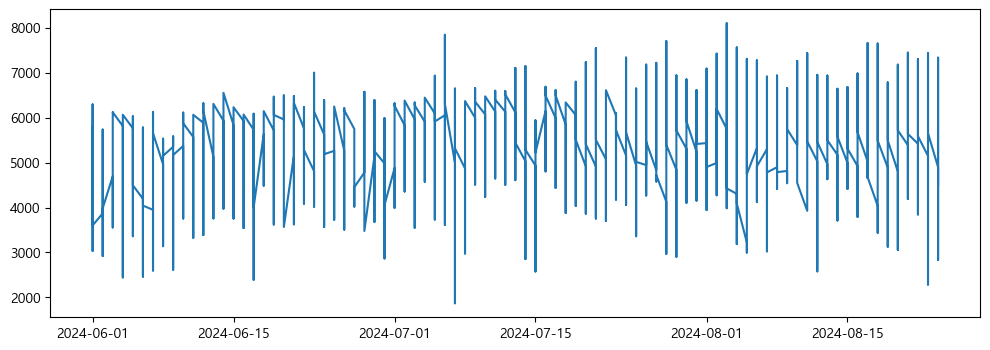

In [133]:
ts_plot(train_b1, "날짜", "전력소비량")

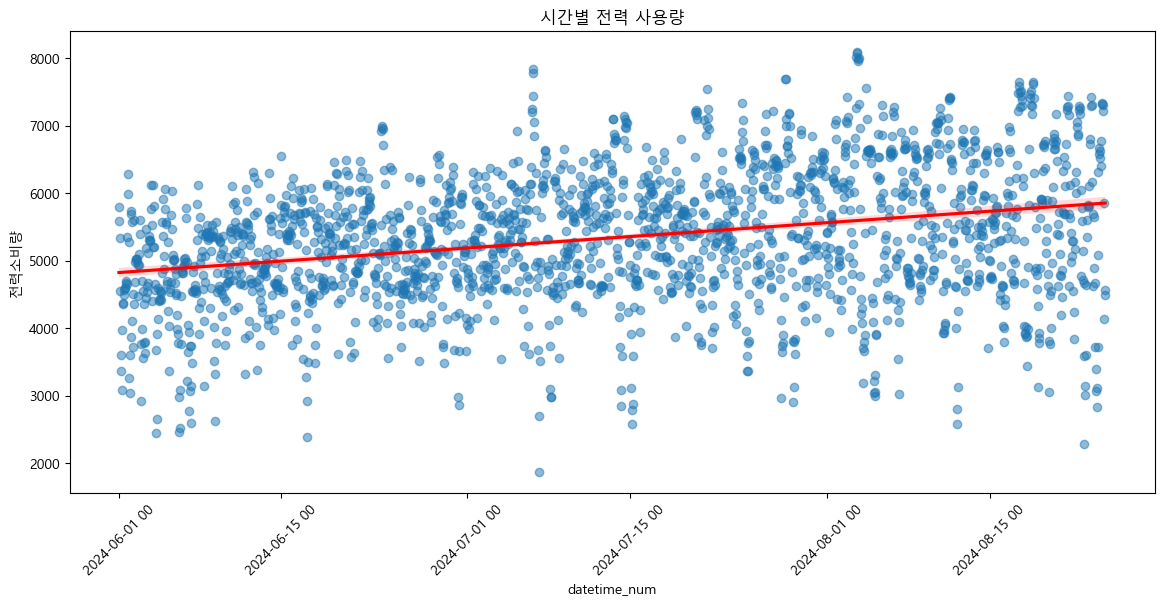

In [134]:
import matplotlib.dates as mdates
import seaborn as sns


train_b1['datetime_num'] = mdates.date2num(train_b1['datetime'])

plt.figure(figsize=(14, 6))
sns.regplot(
    data=train_b1,
    x='datetime_num',
    y='전력소비량',
    scatter_kws={'alpha':0.5},
    line_kws={'color': 'red'}
)

# x축 다시 datetime으로 포맷팅
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H'))
plt.xticks(rotation=45)
plt.title('시간별 전력 사용량')
plt.show()

In [135]:
train_b1_d1 = train[ train["건물번호"] == 1 ][train["날짜"] == "2024-06-01"].copy()
train_b1_d1

C:\Users\leehy\AppData\Local\Temp\ipykernel_15300\29555953.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_b1_d1 = train[ train["건물번호"] == 1 ][train["날짜"] == "2024-06-01"].copy()


,datetime,건물번호,기온,강수량,풍속,습도,일조,일사,전력소비량,날짜,시간
0,2024-06-01 00:00:00,1,18.3,0.0,2.6,82.0,0.0,0.00,5794.80,2024-06-01,0
1,2024-06-01 01:00:00,1,18.3,0.0,2.7,82.0,0.0,0.00,5591.85,2024-06-01,1
2,2024-06-01 02:00:00,1,18.1,0.0,2.6,80.0,0.0,0.00,5338.17,2024-06-01,2
3,2024-06-01 03:00:00,1,18.0,0.0,2.6,81.0,0.0,0.00,4554.42,2024-06-01,3
4,2024-06-01 04:00:00,1,17.8,0.0,1.3,81.0,0.0,0.00,3602.25,2024-06-01,4
5,2024-06-01 05:00:00,1,17.7,0.0,2.2,83.0,0.0,0.00,3367.59,2024-06-01,5
6,2024-06-01 06:00:00,1,17.6,0.0,1.7,85.0,0.0,0.02,3089.40,2024-06-01,6
7,2024-06-01 07:00:00,1,17.7,0.0,1.2,81.0,0.0,0.22,3977.67,2024-06-01,7
8,2024-06-01 08:00:00,1,18.2,0.0,1.8,78.0,0.0,0.56,4380.45,2024-06-01,8
9,2024-06-01 09:00:00,1,19.4,0.0,2.4,70.0,0.4,1.27,4359.78,2024-06-01,9


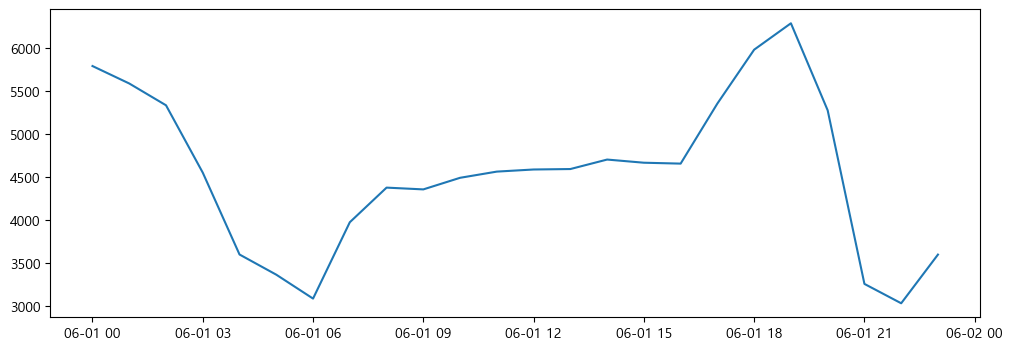

In [136]:
ts_plot(train_b1_d1, "datetime", "전력소비량")

In [137]:
train_b2_d1 = train[ train["건물번호"] == 2 ][train["날짜"] == "2024-06-01"].copy()

C:\Users\leehy\AppData\Local\Temp\ipykernel_15300\3768147210.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_b2_d1 = train[ train["건물번호"] == 2 ][train["날짜"] == "2024-06-01"].copy()


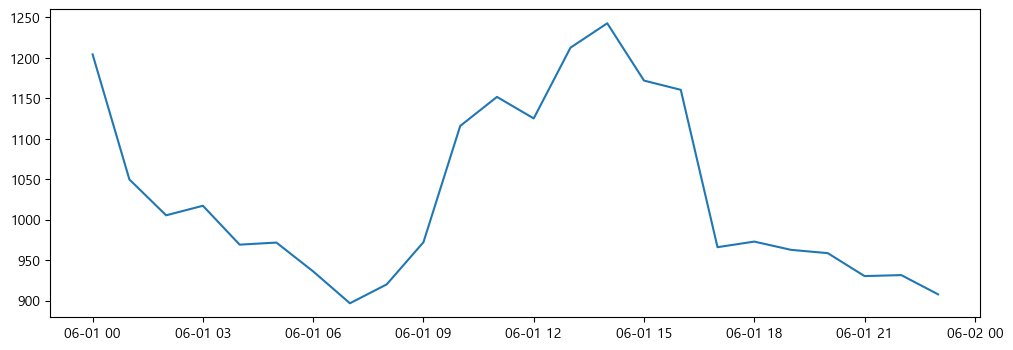

In [138]:
ts_plot(train_b2_d1, "datetime", "전력소비량")

In [139]:
train_b1_d2 = train[ train["건물번호"] == 1 ][train["날짜"] == "2024-06-02"].copy()

C:\Users\leehy\AppData\Local\Temp\ipykernel_15300\2472119248.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_b1_d2 = train[ train["건물번호"] == 1 ][train["날짜"] == "2024-06-02"].copy()


In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc



def plot_daily_comparison(df, building_id, dates, value_col='전력소비량'):

    df_plot = df[df['건물번호'] == building_id].copy()
    
    # 날짜/시간 컬럼 생성
    df_plot['날짜'] = df_plot['datetime'].dt.date
    df_plot['시간'] = df_plot['datetime'].dt.hour
    
    # 선택한 날짜만 필터링
    df_plot = df_plot[df_plot['날짜'].isin(pd.to_datetime(dates).date)]
    
    plt.figure(figsize=(12,6))
    sns.lineplot(
        data=df_plot, 
        x='시간', 
        y=value_col, 
        hue='날짜', 
        marker='o'
    )
    plt.title(f'b{building_id} 시간별 전력소비량 비교')
    plt.xlabel('시간')
    plt.ylabel(value_col)
    plt.xticks(range(0,24))
    plt.grid(True)
    plt.show()


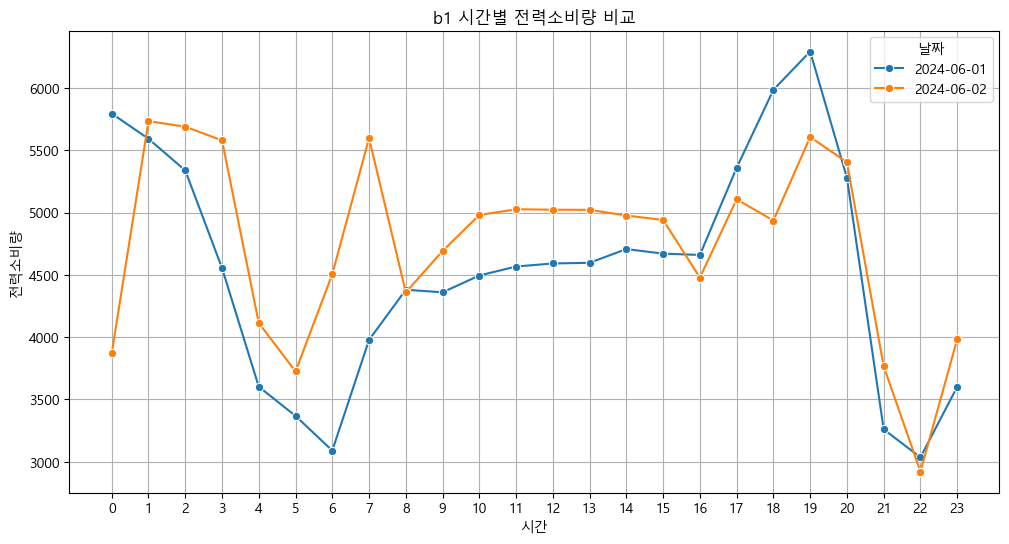

In [141]:
plot_daily_comparison(train, building_id=1, dates=['2024-06-01', '2024-06-02'])


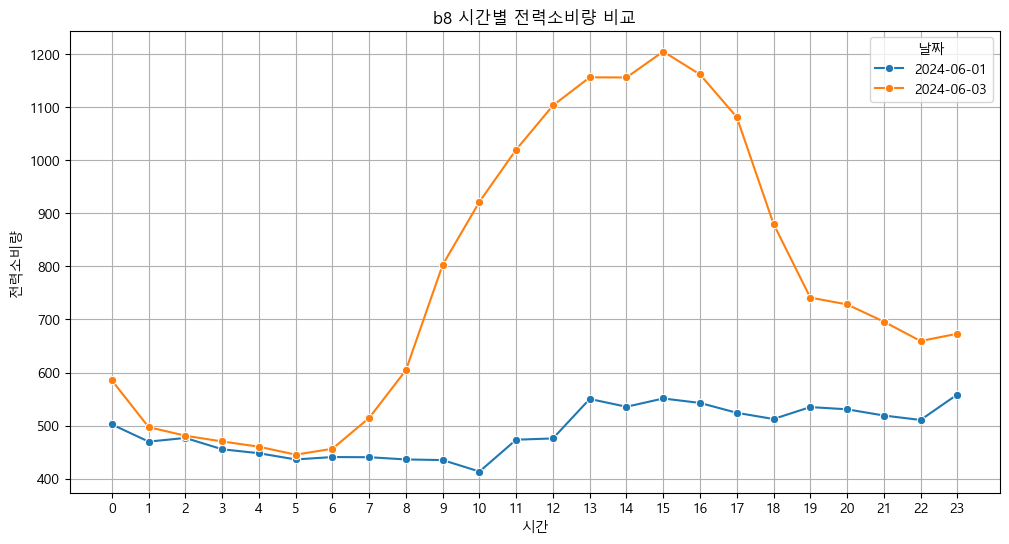

In [142]:
plot_daily_comparison(train, building_id=8, dates=['2024-06-01', '2024-06-03'])

In [143]:


def plot_building_comparison(df, buildings, value_col='전력소비량'):

    df_plot = df[df['건물번호'].isin(buildings)].copy()
    
    # 시간(HH) 컬럼 생성
    df_plot['시간'] = df_plot['datetime'].dt.hour
    
    plt.figure(figsize=(12,6))
    sns.lineplot(
        data=df_plot,
        x='시간',
        y=value_col,
        hue='건물번호',
        marker='o'
    )
    plt.title('건물별 시간대 전력 사용량 비교')
    plt.xlabel('시간')
    plt.ylabel(value_col)
    plt.xticks(range(0,24))
    plt.grid(True)
    plt.show()


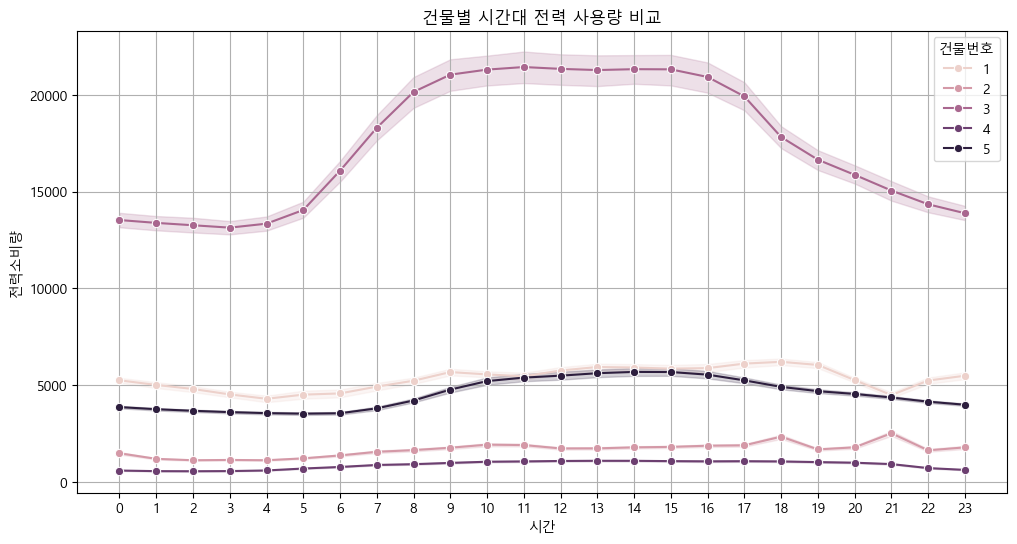

In [144]:
# 건물 1, 2, 3 비교
plot_building_comparison(train, buildings=[1,2,3,4,5])


In [145]:
def plot_building_datetime_comparison(df, buildings, start_date=None, end_date=None, value_col='전력소비량'):

    df_plot = df[df['건물번호'].isin(buildings)].copy()
    
    # datetime 기준 필터링
    if start_date:
        df_plot = df_plot[df_plot['datetime'] >= pd.to_datetime(start_date)]
    if end_date:
        df_plot = df_plot[df_plot['datetime'] <= pd.to_datetime(end_date)]
    
    plt.figure(figsize=(14,6))
    sns.lineplot(
        data=df_plot,
        x='datetime',
        y=value_col,
        hue='건물번호',
        #marker='o'
    )
    plt.title(f'{start_date} ~ {end_date} 건물별 전력 사용량 비교')
    plt.xlabel('Datetime')
    plt.ylabel(value_col)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


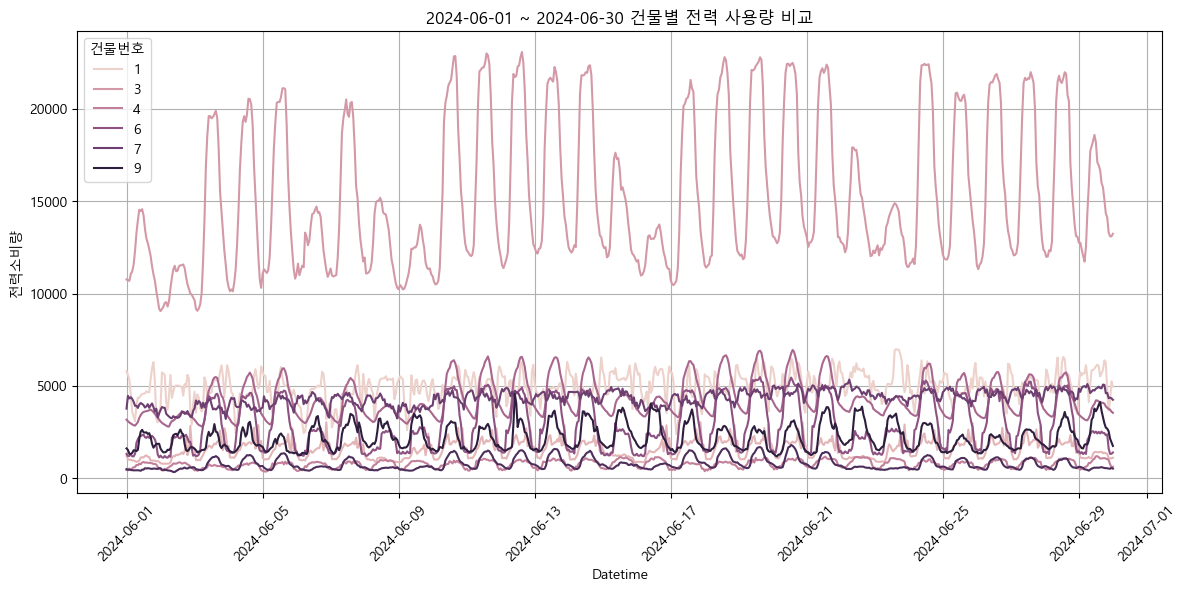

In [146]:
# 2024-06-01부터 2024-06-02까지 건물 1,2 비교
plot_building_datetime_comparison(
    train,
    buildings=range(0,10),
    start_date='2024-06-01',
    end_date='2024-06-30'
)


### 전처리

In [147]:
train.head()

,datetime,건물번호,기온,강수량,풍속,습도,일조,일사,전력소비량,날짜,시간
0,2024-06-01 00:00:00,1,18.3,0.0,2.6,82.0,0.0,0.0,5794.80,2024-06-01,0
1,2024-06-01 01:00:00,1,18.3,0.0,2.7,82.0,0.0,0.0,5591.85,2024-06-01,1
2,2024-06-01 02:00:00,1,18.1,0.0,2.6,80.0,0.0,0.0,5338.17,2024-06-01,2
3,2024-06-01 03:00:00,1,18.0,0.0,2.6,81.0,0.0,0.0,4554.42,2024-06-01,3
4,2024-06-01 04:00:00,1,17.8,0.0,1.3,81.0,0.0,0.0,3602.25,2024-06-01,4


In [148]:
train= train.merge(
    building,
    on='건물번호',
    how='left'  # train에 있는 건물번호 기준으로 합침
)

train.head()

,datetime,건물번호,기온,강수량,풍속,습도,일조,일사,전력소비량,날짜,시간,건물유형,연면적,냉방면적,태양광용량,ESS저장용량,PCS용량
0,2024-06-01 00:00:00,1,18.3,0.0,2.6,82.0,0.0,0.0,5794.80,2024-06-01,0,호텔,82912.71,77586.0,NaN,NaN,NaN
1,2024-06-01 01:00:00,1,18.3,0.0,2.7,82.0,0.0,0.0,5591.85,2024-06-01,1,호텔,82912.71,77586.0,NaN,NaN,NaN
2,2024-06-01 02:00:00,1,18.1,0.0,2.6,80.0,0.0,0.0,5338.17,2024-06-01,2,호텔,82912.71,77586.0,NaN,NaN,NaN
3,2024-06-01 03:00:00,1,18.0,0.0,2.6,81.0,0.0,0.0,4554.42,2024-06-01,3,호텔,82912.71,77586.0,NaN,NaN,NaN
4,2024-06-01 04:00:00,1,17.8,0.0,1.3,81.0,0.0,0.0,3602.25,2024-06-01,4,호텔,82912.71,77586.0,NaN,NaN,NaN


In [149]:
train.tail()

,datetime,건물번호,기온,강수량,풍속,습도,일조,일사,전력소비량,날짜,시간,건물유형,연면적,냉방면적,태양광용량,ESS저장용량,PCS용량
203995,2024-08-24 19:00:00,100,29.1,0.0,4.4,76.0,0.4,0.18,3276.00,2024-08-24,19,호텔,162070.24,152943.0,NaN,NaN,NaN
203996,2024-08-24 20:00:00,100,28.6,0.0,3.7,74.0,0.0,0.00,3197.52,2024-08-24,20,호텔,162070.24,152943.0,NaN,NaN,NaN
203997,2024-08-24 21:00:00,100,28.3,0.0,2.9,74.0,0.0,0.00,3006.60,2024-08-24,21,호텔,162070.24,152943.0,NaN,NaN,NaN
203998,2024-08-24 22:00:00,100,28.0,0.0,1.7,76.0,0.0,0.00,2649.72,2024-08-24,22,호텔,162070.24,152943.0,NaN,NaN,NaN
203999,2024-08-24 23:00:00,100,28.0,0.0,2.1,75.0,0.0,0.00,2929.32,2024-08-24,23,호텔,162070.24,152943.0,NaN,NaN,NaN


In [150]:
test= test.merge(
    building,
    on='건물번호',
    how='left'  # train에 있는 건물번호 기준으로 합침
)

test.head()

,datetime,건물번호,기온,강수량,풍속,습도,날짜,시간,건물유형,연면적,냉방면적,태양광용량,ESS저장용량,PCS용량
0,2024-08-25 00:00:00,1,26.5,0.0,0.7,80.0,2024-08-25,0,호텔,82912.71,77586.0,NaN,NaN,NaN
1,2024-08-25 01:00:00,1,26.1,0.0,0.0,80.0,2024-08-25,1,호텔,82912.71,77586.0,NaN,NaN,NaN
2,2024-08-25 02:00:00,1,25.9,0.0,0.3,83.0,2024-08-25,2,호텔,82912.71,77586.0,NaN,NaN,NaN
3,2024-08-25 03:00:00,1,25.7,0.0,1.1,83.0,2024-08-25,3,호텔,82912.71,77586.0,NaN,NaN,NaN
4,2024-08-25 04:00:00,1,25.5,0.0,1.0,86.0,2024-08-25,4,호텔,82912.71,77586.0,NaN,NaN,NaN


In [151]:
test.tail()

,datetime,건물번호,기온,강수량,풍속,습도,날짜,시간,건물유형,연면적,냉방면적,태양광용량,ESS저장용량,PCS용량
16795,2024-08-31 19:00:00,100,27.1,0.0,2.7,68.0,2024-08-31,19,호텔,162070.24,152943.0,NaN,NaN,NaN
16796,2024-08-31 20:00:00,100,26.5,0.0,2.9,73.0,2024-08-31,20,호텔,162070.24,152943.0,NaN,NaN,NaN
16797,2024-08-31 21:00:00,100,26.3,0.0,3.5,73.0,2024-08-31,21,호텔,162070.24,152943.0,NaN,NaN,NaN
16798,2024-08-31 22:00:00,100,26.0,0.0,3.4,68.0,2024-08-31,22,호텔,162070.24,152943.0,NaN,NaN,NaN
16799,2024-08-31 23:00:00,100,25.7,0.0,2.9,72.0,2024-08-31,23,호텔,162070.24,152943.0,NaN,NaN,NaN


In [152]:
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['weekday'] = train['datetime'].dt.weekday        # 월=0, 일=6
train['is_weekend'] = train['weekday'].isin([5,6]).astype(int)
train['month'] = train['datetime'].dt.month

In [153]:
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['weekday'] = test['datetime'].dt.weekday        # 월=0, 일=6
test['is_weekend'] = test['weekday'].isin([5,6]).astype(int)
test['month'] = test['datetime'].dt.month

In [154]:
train

,datetime,건물번호,기온,강수량,풍속,습도,일조,일사,전력소비량,날짜,...,연면적,냉방면적,태양광용량,ESS저장용량,PCS용량,hour,day,weekday,is_weekend,month
0,2024-06-01 00:00:00,1,18.3,0.0,2.6,82.0,0.0,0.00,5794.80,2024-06-01,...,82912.71,77586.0,NaN,NaN,NaN,0,1,5,1,6
1,2024-06-01 01:00:00,1,18.3,0.0,2.7,82.0,0.0,0.00,5591.85,2024-06-01,...,82912.71,77586.0,NaN,NaN,NaN,1,1,5,1,6
2,2024-06-01 02:00:00,1,18.1,0.0,2.6,80.0,0.0,0.00,5338.17,2024-06-01,...,82912.71,77586.0,NaN,NaN,NaN,2,1,5,1,6
3,2024-06-01 03:00:00,1,18.0,0.0,2.6,81.0,0.0,0.00,4554.42,2024-06-01,...,82912.71,77586.0,NaN,NaN,NaN,3,1,5,1,6
4,2024-06-01 04:00:00,1,17.8,0.0,1.3,81.0,0.0,0.00,3602.25,2024-06-01,...,82912.71,77586.0,NaN,NaN,NaN,4,1,5,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,2024-08-24 19:00:00,100,29.1,0.0,4.4,76.0,0.4,0.18,3276.00,2024-08-24,...,162070.24,152943.0,NaN,NaN,NaN,19,24,5,1,8
203996,2024-08-24 20:00:00,100,28.6,0.0,3.7,74.0,0.0,0.00,3197.52,2024-08-24,...,162070.24,152943.0,NaN,NaN,NaN,20,24,5,1,8
203997,2024-08-24 21:00:00,100,28.3,0.0,2.9,74.0,0.0,0.00,3006.60,2024-08-24,...,162070.24,152943.0,NaN,NaN,NaN,21,24,5,1,8
203998,2024-08-24 22:00:00,100,28.0,0.0,1.7,76.0,0.0,0.00,2649.72,2024-08-24,...,162070.24,152943.0,NaN,NaN,NaN,22,24,5,1,8


In [155]:
test.head()

,datetime,건물번호,기온,강수량,풍속,습도,날짜,시간,건물유형,연면적,냉방면적,태양광용량,ESS저장용량,PCS용량,hour,day,weekday,is_weekend,month
0,2024-08-25 00:00:00,1,26.5,0.0,0.7,80.0,2024-08-25,0,호텔,82912.71,77586.0,NaN,NaN,NaN,0,25,6,1,8
1,2024-08-25 01:00:00,1,26.1,0.0,0.0,80.0,2024-08-25,1,호텔,82912.71,77586.0,NaN,NaN,NaN,1,25,6,1,8
2,2024-08-25 02:00:00,1,25.9,0.0,0.3,83.0,2024-08-25,2,호텔,82912.71,77586.0,NaN,NaN,NaN,2,25,6,1,8
3,2024-08-25 03:00:00,1,25.7,0.0,1.1,83.0,2024-08-25,3,호텔,82912.71,77586.0,NaN,NaN,NaN,3,25,6,1,8
4,2024-08-25 04:00:00,1,25.5,0.0,1.0,86.0,2024-08-25,4,호텔,82912.71,77586.0,NaN,NaN,NaN,4,25,6,1,8


In [156]:
train['lag_1'] = train.groupby('건물번호')['전력소비량'].shift(1)
train['lag_24'] = train.groupby('건물번호')['전력소비량'].shift(24)

train['roll_6'] = train.groupby('건물번호')['전력소비량'].rolling(6).mean().reset_index(0,drop=True)
train['roll_24'] = train.groupby('건물번호')['전력소비량'].rolling(24).mean().reset_index(0,drop=True)

In [157]:
test["lag_1"] = np.nan
test["lag_24"] = np.nan

test["roll_6"] = np.nan
test["roll_24"]= np.nan

In [158]:
train = pd.get_dummies(train, columns=['건물유형'], drop_first=True)
test = pd.get_dummies(test, columns=['건물유형'], drop_first=True)

In [159]:
train['연면적_log'] = np.log1p(train['연면적'])
train['냉방면적_log'] = np.log1p(train['냉방면적'])
test['연면적_log'] = np.log1p(test['연면적'])
test['냉방면적_log'] = np.log1p(test['냉방면적'])

In [160]:
train.head()

,datetime,건물번호,기온,강수량,풍속,습도,일조,일사,전력소비량,날짜,...,건물유형_공공,건물유형_백화점,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_학교,건물유형_호텔,연면적_log,냉방면적_log
0,2024-06-01 00:00:00,1,18.3,0.0,2.6,82.0,0.0,0.0,5794.80,2024-06-01,...,False,False,False,False,False,False,False,True,11.325556,11.259155
1,2024-06-01 01:00:00,1,18.3,0.0,2.7,82.0,0.0,0.0,5591.85,2024-06-01,...,False,False,False,False,False,False,False,True,11.325556,11.259155
2,2024-06-01 02:00:00,1,18.1,0.0,2.6,80.0,0.0,0.0,5338.17,2024-06-01,...,False,False,False,False,False,False,False,True,11.325556,11.259155
3,2024-06-01 03:00:00,1,18.0,0.0,2.6,81.0,0.0,0.0,4554.42,2024-06-01,...,False,False,False,False,False,False,False,True,11.325556,11.259155
4,2024-06-01 04:00:00,1,17.8,0.0,1.3,81.0,0.0,0.0,3602.25,2024-06-01,...,False,False,False,False,False,False,False,True,11.325556,11.259155


In [161]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 36 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   datetime    204000 non-null  datetime64[ns]
 1   건물번호        204000 non-null  int64         
 2   기온          204000 non-null  float64       
 3   강수량         204000 non-null  float64       
 4   풍속          204000 non-null  float64       
 5   습도          204000 non-null  float64       
 6   일조          204000 non-null  float64       
 7   일사          204000 non-null  float64       
 8   전력소비량       204000 non-null  float64       
 9   날짜          204000 non-null  datetime64[ns]
 10  시간          204000 non-null  int32         
 11  연면적         204000 non-null  float64       
 12  냉방면적        204000 non-null  float64       
 13  태양광용량       108120 non-null  object        
 14  ESS저장용량     24480 non-null   object        
 15  PCS용량       24480 non-null   object        
 16  ho

In [162]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    16800 non-null  datetime64[ns]
 1   건물번호        16800 non-null  int64         
 2   기온          16800 non-null  float64       
 3   강수량         16800 non-null  float64       
 4   풍속          16800 non-null  float64       
 5   습도          16800 non-null  float64       
 6   날짜          16800 non-null  datetime64[ns]
 7   시간          16800 non-null  int32         
 8   연면적         16800 non-null  float64       
 9   냉방면적        16800 non-null  float64       
 10  태양광용량       8904 non-null   object        
 11  ESS저장용량     2016 non-null   object        
 12  PCS용량       2016 non-null   object        
 13  hour        16800 non-null  int32         
 14  day         16800 non-null  int32         
 15  weekday     16800 non-null  int32         
 16  is_weekend  16800 non-

In [163]:
drop_col1 = ["날짜", "시간", "연면적", "냉방면적","일조","일사"]
drop_col2 = ["날짜", "시간", "연면적", "냉방면적"]
train = train.drop(columns=drop_col1)
test = test.drop(columns=drop_col2)

In [164]:
train.columns

Index(['datetime', '건물번호', '기온', '강수량', '풍속', '습도', '전력소비량', '태양광용량',
       'ESS저장용량', 'PCS용량', 'hour', 'day', 'weekday', 'is_weekend', 'month',
       'lag_1', 'lag_24', 'roll_6', 'roll_24', '건물유형_건물기타', '건물유형_공공',
       '건물유형_백화점', '건물유형_병원', '건물유형_상용', '건물유형_아파트', '건물유형_연구소', '건물유형_학교',
       '건물유형_호텔', '연면적_log', '냉방면적_log'],
      dtype='object')

In [165]:
test.columns

Index(['datetime', '건물번호', '기온', '강수량', '풍속', '습도', '태양광용량', 'ESS저장용량',
       'PCS용량', 'hour', 'day', 'weekday', 'is_weekend', 'month', 'lag_1',
       'lag_24', 'roll_6', 'roll_24', '건물유형_건물기타', '건물유형_공공', '건물유형_백화점',
       '건물유형_병원', '건물유형_상용', '건물유형_아파트', '건물유형_연구소', '건물유형_학교', '건물유형_호텔',
       '연면적_log', '냉방면적_log'],
      dtype='object')

In [168]:
train.head()

,datetime,건물번호,기온,강수량,풍속,습도,전력소비량,태양광용량,ESS저장용량,PCS용량,...,건물유형_공공,건물유형_백화점,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_학교,건물유형_호텔,연면적_log,냉방면적_log
0,2024-06-01 00:00:00,1,18.3,0.0,2.6,82.0,5794.80,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,11.325556,11.259155
1,2024-06-01 01:00:00,1,18.3,0.0,2.7,82.0,5591.85,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,11.325556,11.259155
2,2024-06-01 02:00:00,1,18.1,0.0,2.6,80.0,5338.17,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,11.325556,11.259155
3,2024-06-01 03:00:00,1,18.0,0.0,2.6,81.0,4554.42,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,11.325556,11.259155
4,2024-06-01 04:00:00,1,17.8,0.0,1.3,81.0,3602.25,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,11.325556,11.259155


In [167]:
test.head()

,datetime,건물번호,기온,강수량,풍속,습도,태양광용량,ESS저장용량,PCS용량,hour,...,건물유형_공공,건물유형_백화점,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_학교,건물유형_호텔,연면적_log,냉방면적_log
0,2024-08-25 00:00:00,1,26.5,0.0,0.7,80.0,NaN,NaN,NaN,0,...,False,False,False,False,False,False,False,True,11.325556,11.259155
1,2024-08-25 01:00:00,1,26.1,0.0,0.0,80.0,NaN,NaN,NaN,1,...,False,False,False,False,False,False,False,True,11.325556,11.259155
2,2024-08-25 02:00:00,1,25.9,0.0,0.3,83.0,NaN,NaN,NaN,2,...,False,False,False,False,False,False,False,True,11.325556,11.259155
3,2024-08-25 03:00:00,1,25.7,0.0,1.1,83.0,NaN,NaN,NaN,3,...,False,False,False,False,False,False,False,True,11.325556,11.259155
4,2024-08-25 04:00:00,1,25.5,0.0,1.0,86.0,NaN,NaN,NaN,4,...,False,False,False,False,False,False,False,True,11.325556,11.259155


In [169]:
train[["ESS저장용량","PCS용량"]]

,ESS저장용량,PCS용량
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
203995,NaN,NaN
203996,NaN,NaN
203997,NaN,NaN
203998,NaN,NaN


In [173]:
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB 9.2 MB/s eta 0:00:12
   ---------------------------------------- 0.8/102.4 MB 10.4 MB/s eta 0:00:10
    --------------------------------------- 1.7/102.4 MB 12.0 MB/s eta 0:00:09
   - -------------------------------------- 2.6/102.4 MB 12.9 MB/s eta 0:00:08
   - -------------------------------------- 3.0/102.4 MB 11.9 MB/s eta 0:00:09
   - -------------------------------------- 3.7/102.4 MB 13.2 MB/s eta 0:00:08
   - -------------------------------------- 4.4/102.4 MB 12.6 MB/s eta 0:00:08
   - -------------------------------------- 5.0/102.4 MB 12.7 MB/s eta 0:00:08
   -- ------------------------------------- 5.2/102.4 MB 11.6 MB/s eta 0:00:09
   -- ------------------------------------- 5.8/102.4 MB 11.6 MB/s eta 0:00:09
   -- ------------------------------------- 6.9/102.4 MB 12.6 MB/s eta 0:00:08
   --- ------------------------------------ 8.0/102.4 MB 12.8

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor







In [175]:
# =====================================
# 1. 컬럼 정리
# =====================================
def preprocess_train_test(train, test):
    # 드랍 컬럼
    drop_cols = ["날짜", "시간", "연면적", "냉방면적", "일조", "일사"]
    train = train.drop(columns=[c for c in drop_cols if c in train.columns])
    test = test.drop(columns=[c for c in drop_cols if c in test.columns])
    
    # lag/rolling이 없으면 생성
    for col in ["lag_1", "lag_24", "roll_6", "roll_24"]:
        if col not in train.columns:
            train[col] = np.nan
        if col not in test.columns:
            test[col] = np.nan
            
    return train, test


In [180]:
# =====================================
# 2. 학습용/검증용 분리
# =====================================
def split_features_target(train, target="전력소비량"):
    X = train.drop(columns=[target])
    y = train[target]
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

    if "datetime" in X_train.columns:
        X_train = X_train.drop(columns=["datetime"])
        X_val = X_val.drop(columns=["datetime"])

    for col in ["태양광용량", "ESS저장용량", "PCS용량"]:
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce').fillna(-1)
        X_val[col] = pd.to_numeric(X_val[col], errors='coerce').fillna(-1)

    return X_train, X_val, y_train, y_val


In [181]:
# =====================================
# 3. 스케일링 (트리계열 필요 없음, 하지만 다른 모델용)
# =====================================
def scale_numeric(X_train, X_val):
    num_cols = X_train.select_dtypes(include=[np.number]).columns
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_val_scaled = X_val.copy()
    X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_val_scaled[num_cols] = scaler.transform(X_val[num_cols])
    return X_train_scaled, X_val_scaled

In [182]:
# =====================================
# 4. ML 모델 학습 및 비교
# =====================================
def compare_models(X_train, X_val, y_train, y_val):
    models = {
        "LightGBM": LGBMRegressor(n_estimators=500, learning_rate=0.05),
        "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.05),
        "CatBoost": CatBoostRegressor(iterations=500, learning_rate=0.05, verbose=0),
        "RandomForest": RandomForestRegressor(n_estimators=300),
        "DecisionTree": DecisionTreeRegressor(),
    }
    
    results = {}
    for name, model in models.items():
        print(f"▶ Training {name}...")
        # 트리계열은 스케일 필요 없음, 나머지는 그대로
        if name in ["RandomForest", "DecisionTree"]:
            # scale numeric 사용 가능, 트리계열은 원본도 OK
            model.fit(X_train, y_train)
            preds = model.predict(X_val)
        else:
            model.fit(X_train, y_train)
            preds = model.predict(X_val)
            
        mae = mean_absolute_error(y_val, preds)
        rmse = np.sqrt(mean_squared_error(y_val, preds))
        results[name] = {"MAE": mae, "RMSE": rmse}
    
    # 결과 출력
    print("\n=== 모델 비교 결과 ===")
    for name, metrics in results.items():
        print(f"{name} → MAE: {metrics['MAE']:.2f}, RMSE: {metrics['RMSE']:.2f}")
    
    best_model_name = min(results, key=lambda x: results[x]["RMSE"])
    print(f"\n🔥 최종 선택 모델: {best_model_name}")
    
    return models[best_model_name], best_model_name

In [183]:
train, test = preprocess_train_test(train, test)
X_train, X_val, y_train, y_val = split_features_target(train)
best_model, model_name = compare_models(X_train, X_val, y_train, y_val)

▶ Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2054
[LightGBM] [Info] Number of data points in the train set: 163200, number of used features: 28
[LightGBM] [Info] Start training from score 3699.474329
▶ Training XGBoost...
▶ Training CatBoost...
▶ Training RandomForest...
▶ Training DecisionTree...

=== 모델 비교 결과 ===
LightGBM → MAE: 128.99, RMSE: 228.89
XGBoost → MAE: 139.82, RMSE: 253.26
CatBoost → MAE: 241.31, RMSE: 379.12
RandomForest → MAE: 123.70, RMSE: 268.88
DecisionTree → MAE: 180.25, RMSE: 374.66

🔥 최종 선택 모델: LightGBM


In [184]:
# =====================================
# 1. test 데이터 전처리
# =====================================
# train과 동일하게 lag/rolling, object 컬럼 처리 필요
def preprocess_test_for_model(test):
    # datetime은 drop
    if "datetime" in test.columns:
        test = test.drop(columns=["datetime"])
    
    # object → numeric, NaN 처리 (LightGBM은 NaN 그대로 가능)
    for col in ["태양광용량", "ESS저장용량", "PCS용량"]:
        if col in test.columns:
            test[col] = pd.to_numeric(test[col], errors='coerce')
    return test

# =====================================
# 2. test 전처리
# =====================================
X_test = preprocess_test_for_model(test)

# =====================================
# 3. LightGBM 예측
# =====================================
y_pred = best_model.predict(X_test)

# =====================================
# 4. 결과 확인
# =====================================
print("Test 예측값 샘플:")
print(y_pred[:10])




Test 예측값 샘플:
[1635.90117875 1635.90117875 1952.83081847 2069.47470415 2188.94192247
 2214.25720212 2387.14816905 2444.72855408 2384.90322566 2396.6633926 ]


In [185]:
# 필요시 DataFrame으로 저장
submission = test.copy()
submission["전력소비량_pred"] = y_pred

In [186]:
submission = pd.DataFrame({
    "num_date_time": test_row["num_date_time"],
    "answer": y_pred
})

In [187]:
submission

,num_date_time,answer
0,1_20240825 00,1635.901179
1,1_20240825 01,1635.901179
2,1_20240825 02,1952.830818
3,1_20240825 03,2069.474704
4,1_20240825 04,2188.941922
...,...,...
16795,100_20240831 19,2326.960252
16796,100_20240831 20,2265.481423
16797,100_20240831 21,2235.788551
16798,100_20240831 22,2177.365719


In [188]:
submission.to_csv("submission.csv", index=False)